<a href="https://colab.research.google.com/github/Emadalnajaar/Naive_Bayes-/blob/master/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import seaborn  as sns 
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , Normalizer , MinMaxScaler
from sklearn.naive_bayes import GaussianNB , BernoulliNB, MultinomialNB, ComplementNB, CategoricalNB
from sklearn.metrics import accuracy_score , confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('/content/heart.csv')

In [0]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [0]:
data.shape

(303, 14)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [0]:
pd.crosstab(data['target'],data['sex']).sum()

sex
0     96
1    207
dtype: int64

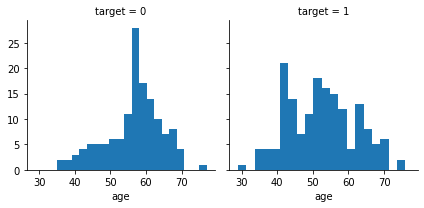

In [0]:
ta = sns.FacetGrid(data, col='target')
ta.map(plt.hist , 'age' ,  bins=20)

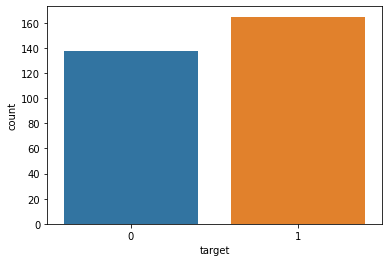

In [0]:
sns.countplot(data['target'])

In [0]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
corr = data.corr().abs()
corr['target'].sort_values(ascending = False)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

Text(0.5, 1.05, 'Correlations Feature')

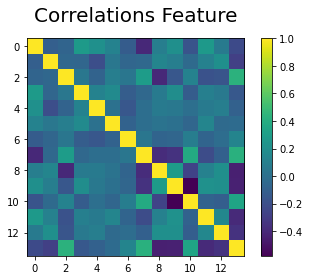

In [0]:
title_config = {'fontsize': 20, 'y': 1.05}
plt.imshow(data.corr())
plt.colorbar()
plt.title("Correlations Feature" , **title_config)

this step optional 

In [0]:
data = data.drop(['fbs','chol'] , axis=1)

In [0]:
data.shape

(303, 12)

In [0]:
data.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1


In [0]:
X = data.drop(['target'] , axis=1)

In [0]:
y = data['target']

In [0]:
print(X.shape)
print(y.shape)

(303, 11)
(303,)


In [0]:
X_train , X_test , y_train , y_test = train_test_split( X, y, test_size = 0.25, random_state=55)

Scaling
StandardScaler , Normalizer , MinMaxScale

In [0]:
"""
sc  = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

mms  = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test  = mms.fit_transform(X_test)

norm = Normalizer()
X_train = norm.fit_transform(X_train)
X_test  = norm.fit_transform(X_test)
"""

Model


84.58149779735683
82.89473684210526
[[5.27539514e-01 4.72460486e-01]
 [3.68546396e-02 9.63145360e-01]
 [5.57062358e-04 9.99442938e-01]
 [1.93951775e-01 8.06048225e-01]
 [9.99999935e-01 6.49550203e-08]
 [6.06483741e-02 9.39351626e-01]
 [3.17819676e-03 9.96821803e-01]
 [9.72602951e-02 9.02739705e-01]
 [9.99996577e-01 3.42331363e-06]
 [9.98483884e-01 1.51611583e-03]] [0 1 1 1 0 1 1 1 0 0]
CPU times: user 122 ms, sys: 42.5 ms, total: 165 ms
Wall time: 129 ms


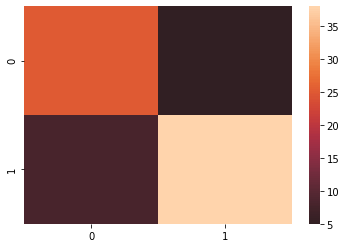

In [0]:
%%time
modelGNB = GaussianNB()
modelGNB.fit(X_train,y_train)
y_pred = modelGNB.predict(X_test)
print(modelGNB.score(X_train,y_train)*100)
print(modelGNB.score(X_test,y_test)*100)
y_pred = modelGNB.predict(X_test)
cm = confusion_matrix(y_pred , y_test)
sns.heatmap(cm , center = True )
predict_proba_Xtest = modelGNB.predict_proba(X_test)
print(predict_proba_Xtest[:10],y_pred[:10])


74.44933920704845
78.94736842105263
[[5.27539514e-01 4.72460486e-01]
 [3.68546396e-02 9.63145360e-01]
 [5.57062358e-04 9.99442938e-01]
 [1.93951775e-01 8.06048225e-01]
 [9.99999935e-01 6.49550203e-08]
 [6.06483741e-02 9.39351626e-01]
 [3.17819676e-03 9.96821803e-01]
 [9.72602951e-02 9.02739705e-01]
 [9.99996577e-01 3.42331363e-06]
 [9.98483884e-01 1.51611583e-03]] [1 1 1 1 0 1 0 1 0 0]
CPU times: user 103 ms, sys: 40.2 ms, total: 143 ms
Wall time: 97 ms


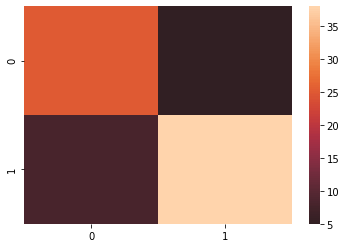

In [0]:
%%time 
modelBNB = BernoulliNB(alpha = 1.0 , binarize=1)
modelBNB.fit(X_train, y_train)
y_pred = modelBNB.predict(X_test)
print(modelBNB.score(X_train,y_train)*100)
print(modelBNB.score(X_test,y_test)*100)
y_pred = modelBNB.predict(X_test)
sns.heatmap(cm , center = True )
predict_proba_Xtest = modelGNB.predict_proba(X_test)
print(predict_proba_Xtest[:10],y_pred[:10])


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
78.41409691629956
78.94736842105263
[[5.27539514e-01 4.72460486e-01]
 [3.68546396e-02 9.63145360e-01]
 [5.57062358e-04 9.99442938e-01]
 [1.93951775e-01 8.06048225e-01]
 [9.99999935e-01 6.49550203e-08]
 [6.06483741e-02 9.39351626e-01]
 [3.17819676e-03 9.96821803e-01]
 [9.72602951e-02 9.02739705e-01]
 [9.99996577e-01 3.42331363e-06]
 [9.98483884e-01 1.51611583e-03]] [1 1 1 1 0 1 1 1 0 0]


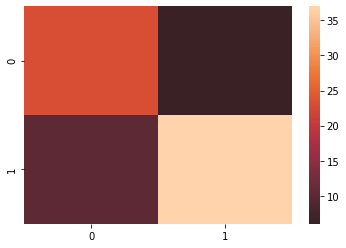

In [0]:
%time 
modelMNB = MultinomialNB(alpha = 1.0)
modelMNB.fit(X_train,y_train)
y_pred = modelMNB.predict(X_test)
print(modelMNB.score(X_train,y_train)*100)
print(modelMNB.score(X_test,y_test)*100)
cm = confusion_matrix(y_pred , y_test)
sns.heatmap(cm , center = True )
predict_proba_Xtest = modelGNB.predict_proba(X_test)
print(predict_proba_Xtest[:10],y_pred[:10])


79.29515418502203
80.26315789473685
[[5.27539514e-01 4.72460486e-01]
 [3.68546396e-02 9.63145360e-01]
 [5.57062358e-04 9.99442938e-01]
 [1.93951775e-01 8.06048225e-01]
 [9.99999935e-01 6.49550203e-08]
 [6.06483741e-02 9.39351626e-01]
 [3.17819676e-03 9.96821803e-01]
 [9.72602951e-02 9.02739705e-01]
 [9.99996577e-01 3.42331363e-06]
 [9.98483884e-01 1.51611583e-03]] [1 1 1 1 0 1 1 1 0 0]
CPU times: user 106 ms, sys: 41.4 ms, total: 147 ms
Wall time: 111 ms


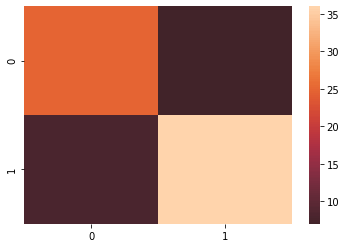

In [0]:
%%time
modelCNB = ComplementNB(alpha = 1.0 ,fit_prior=True, class_prior=None, norm=False)
modelCNB.fit(X_train,y_train)
y_pred = modelCNB.predict(X_test)
print(modelCNB.score(X_train,y_train)*100)
print(modelCNB.score(X_test,y_test)*100)
cm = confusion_matrix(y_pred , y_test)
sns.heatmap(cm , center = True )
predict_proba_Xtest = modelGNB.predict_proba(X_test)
print(predict_proba_Xtest[:10],y_pred[:10])


In [0]:
%%time
modelCANB = CategoricalNB(alpha = 0.01)
modelCANB.fit(X_train,y_train)
print(modelCANB.score(X_train,y_train)*100)

90.7488986784141
CPU times: user 8 ms, sys: 853 µs, total: 8.86 ms
Wall time: 9.46 ms


**CODE COMPLICATION**

now apply all type naive bayes 

84.58149779735683 
 82.89473684210526 
 GaussianNB(priors=None, var_smoothing=1e-09)
__________________________________________________


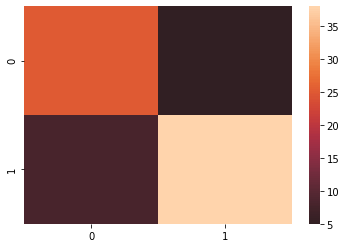

84.58149779735683 
 82.89473684210526 
 GaussianNB(priors=None, var_smoothing=1e-09)
__________________________________________________


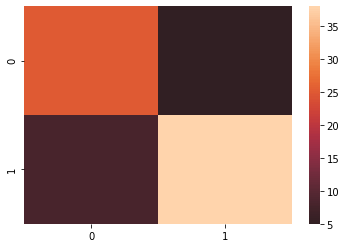

81.93832599118943 
 78.94736842105263 
 BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
__________________________________________________


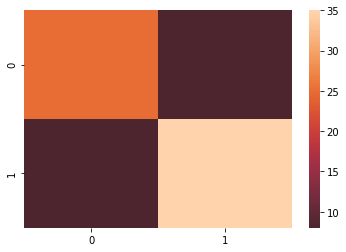

78.41409691629956 
 78.94736842105263 
 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
__________________________________________________


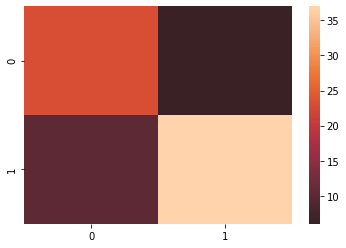

79.29515418502203 
 80.26315789473685 
 ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)
__________________________________________________


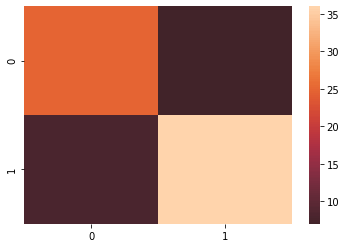

CPU times: user 1.16 s, sys: 469 ms, total: 1.63 s
Wall time: 1.08 s


In [0]:
%%time
for model in [GaussianNB() ,GaussianNB(), BernoulliNB(), MultinomialNB(), ComplementNB()] :
  model.fit(X_train,y_train)
  v1 = model.score(X_train,y_train)*100
  v2 = model.score(X_test,y_test)*100
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_pred , y_test)
  print(v1,'\n',v2,'\n',model)
  print('_'*50)
  sns.heatmap(cm , center = True)
  plt.show()

selection best algorithm

In [0]:
v = 0
CM = None
m = None
for model in [GaussianNB() ,GaussianNB(), BernoulliNB(), MultinomialNB(), ComplementNB(),CategoricalNB()] :
  model.fit(X_train,y_train)
  v1 = model.score(X_train,y_train)*100
  if v1 > v :
    v = v1
    m = model
    CM = cm 
print(v,m)

86.34361233480176 GaussianNB(priors=None, var_smoothing=1e-09)


selection best algorithm but without categoricalNB

84.58149779735683 GaussianNB(priors=None, var_smoothing=1e-09)


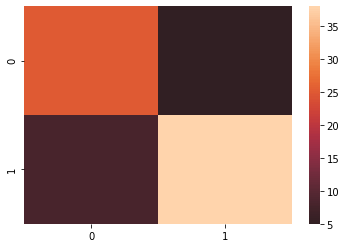

In [0]:
v = 0
CM = None
m = None
for model in [GaussianNB() ,GaussianNB(), BernoulliNB(), MultinomialNB(), ComplementNB()] :
  model.fit(X_train,y_train)
  v1 = model.score(X_train,y_train)*100
  v2 = model.score(X_test,y_test)*100
  y_pred = model.predict(X_test)
  cm = confusion_matrix(y_pred , y_test)
  if v1 > v :
    v = v1
    m = model
    CM = cm 
print(v,m)
sns.heatmap(CM , center = True)

86.78414096916299 
 GaussianNB(priors=None, var_smoothing=1e-09)
____________________________________________________________


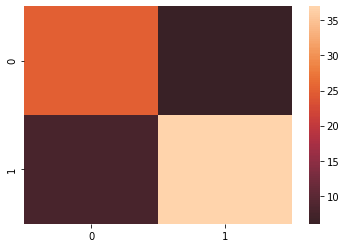

Normalizer(copy=True, norm='l2')
CPU times: user 257 ms, sys: 96.2 ms, total: 353 ms
Wall time: 240 ms


In [0]:
%%time
scal = 0
v = 0
CM = None
m = None
for scale in [StandardScaler(), Normalizer(), MinMaxScaler()]:
  X_train = scale.fit_transform(X_train)
  X_test  = scale.fit_transform(X_test)
  for model in [GaussianNB() ,BernoulliNB()] :
    model.fit(X_train,y_train)
    v1 = model.score(X_train,y_train)*100
    v2 = model.score(X_test,y_test)*100
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_pred , y_test)
    if v1 > v :
      v = v1
      m = model
      CM = cm 
      scal = scale

print(v,'\n',m)
print("_"*60)
sns.heatmap(CM , center = True)
plt.show()
print(scal)

In [0]:
!pip install pandas-profiling

In [0]:
data

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,0,150,0,2.3,0,0,1,1
1,37,1,2,130,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,172,0,1.4,2,0,2,1
3,56,1,1,120,1,178,0,0.8,2,0,2,1
4,57,0,0,120,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,1,123,1,0.2,1,0,3,0
299,45,1,3,110,1,132,0,1.2,1,0,3,0
300,68,1,0,144,1,141,0,3.4,1,2,3,0
301,57,1,0,130,1,115,1,1.2,1,1,3,0


In [0]:
from pandas_profiling import ProfileReport
data = pd.read_csv('heart.csv')
profile = ProfileReport(data, title='Pandas Profiling Report', html={'style':{'full_width':True}})
profile.to_file(output_file="descriptions.html")
